In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


#Setting Up Network

In [2]:
dataA=pd.read_csv('SubwayEdgesCSVUpate.csv', header=0 )
XY=pd.read_csv('stop_locations.csv', header=0 )

In [3]:
pos={}
x = 0
for c in XY.stop_id:
    pos[c]=(XY['stop_lon'][x], XY['stop_lat'][x])
    x = x + 1

In [4]:
networkA = nx.Graph()

In [5]:
uval = []    
    
for i in range(len(dataA)):
    x = pos[dataA.start_node[i]]
    y = pos[dataA.end_node[i]]
    uval.append(sp.spatial.distance.euclidean(x, y))

for k in dataA.index:
    networkA.add_edge(dataA.start_node[k], dataA.end_node[k], weight=dataA.weight[k], dist=uval[k])

In [6]:
def visualize_path(path, path_color, node_color):
    x=[pos[v][0] for v in path]
    y=[pos[v][1] for v in path]
    plt.plot(x,y, color = path_color, linewidth=4.0, linestyle = '-', alpha=1)
    plt.plot([x[0],x[-1]],[y[0],y[-1]], markerfacecolor = node_color, marker = 'o', linestyle = '.', markersize=15, alpha=0.5)

In [7]:
time = [0, 10, 20, 30, 40, 50, 60]
time_2 = [60, 50, 40, 30, 20, 10]
#(blue) colors = ['#E8F8FF', '#B4DCED', '#91C9E8', '#67B8DE', '#3399CC', '#1786CC']
colors = ['#0D3C55', '#1395BA', '#A2B86C', '#EBC844', '#F16C20', '#C02E1D']

#Spider Web Plots

/Users/erwan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/erwan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


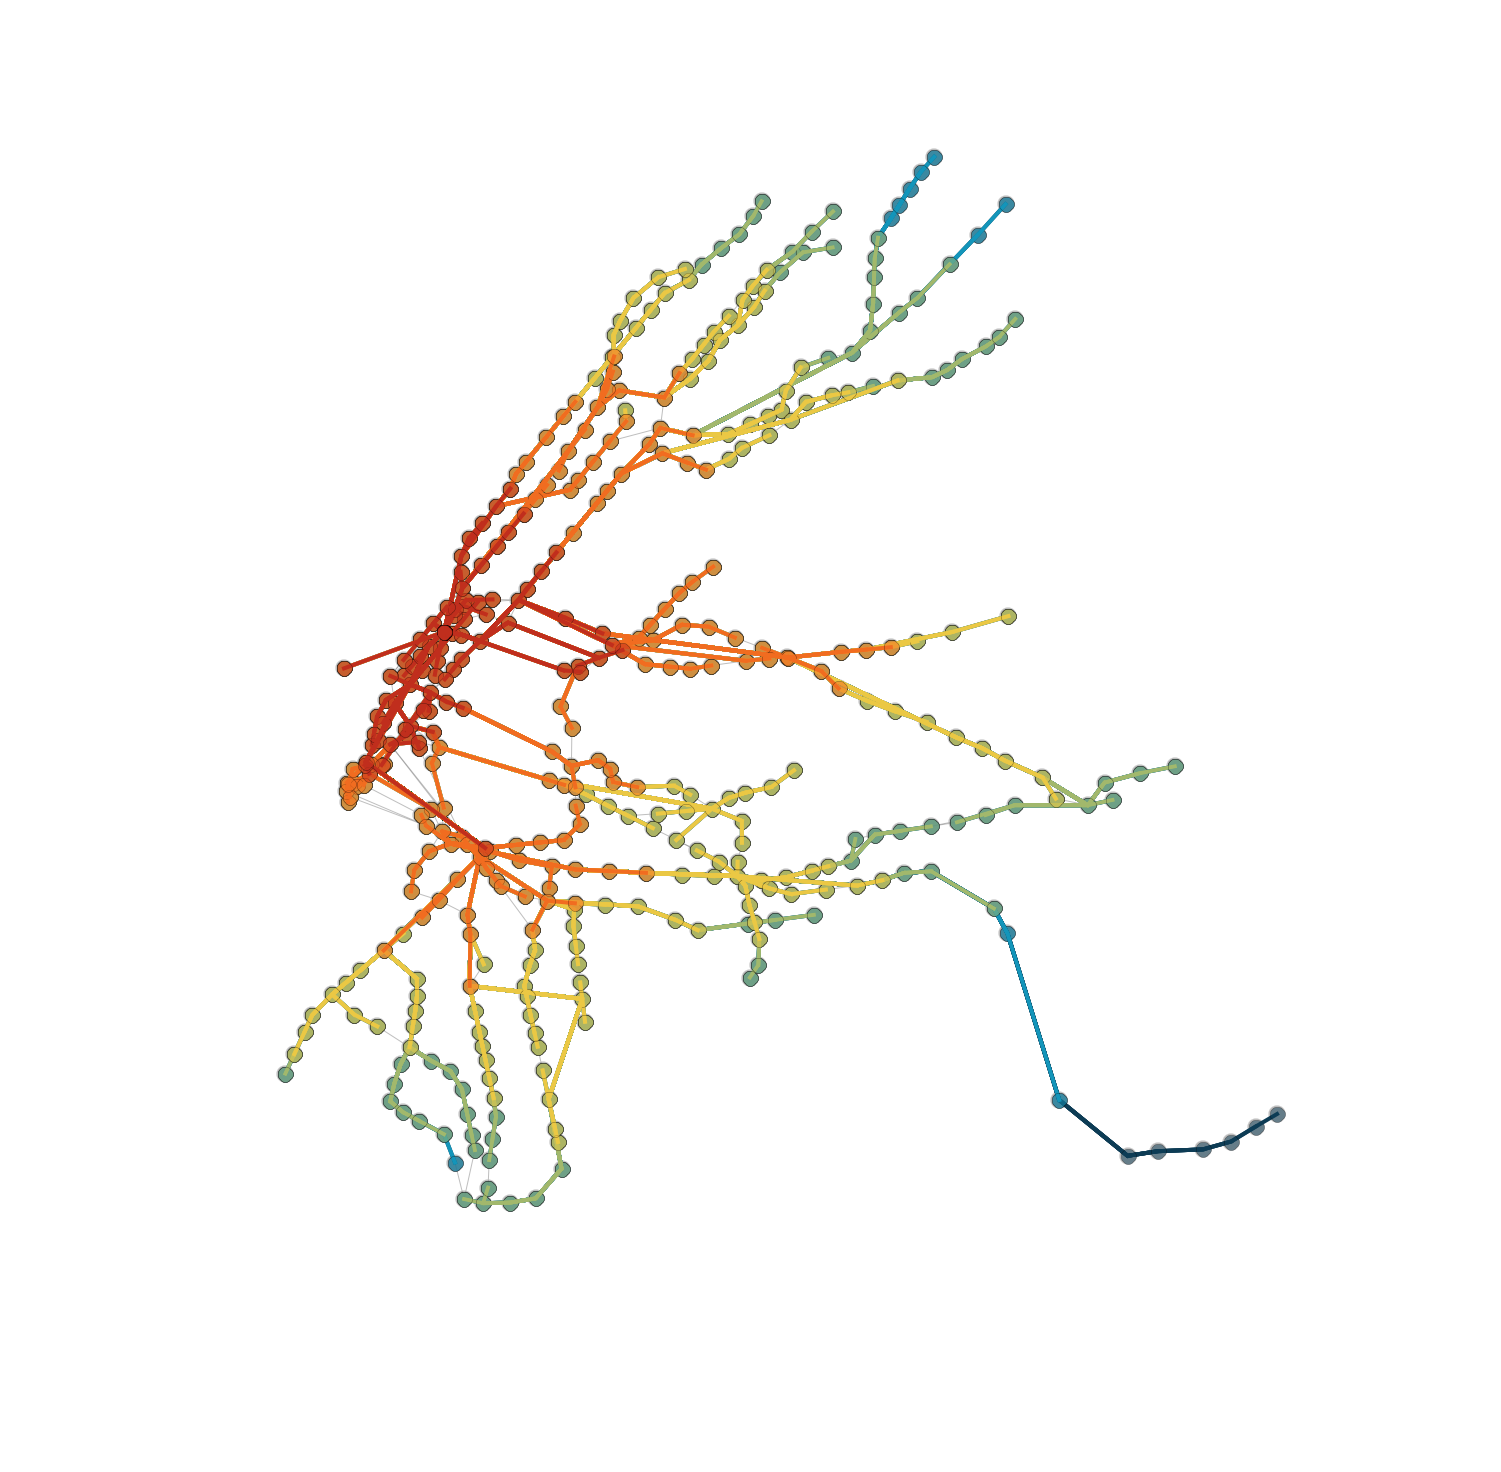

In [8]:
# node is starting node
# last argument is number of minutes

node = 'R16' #times square

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

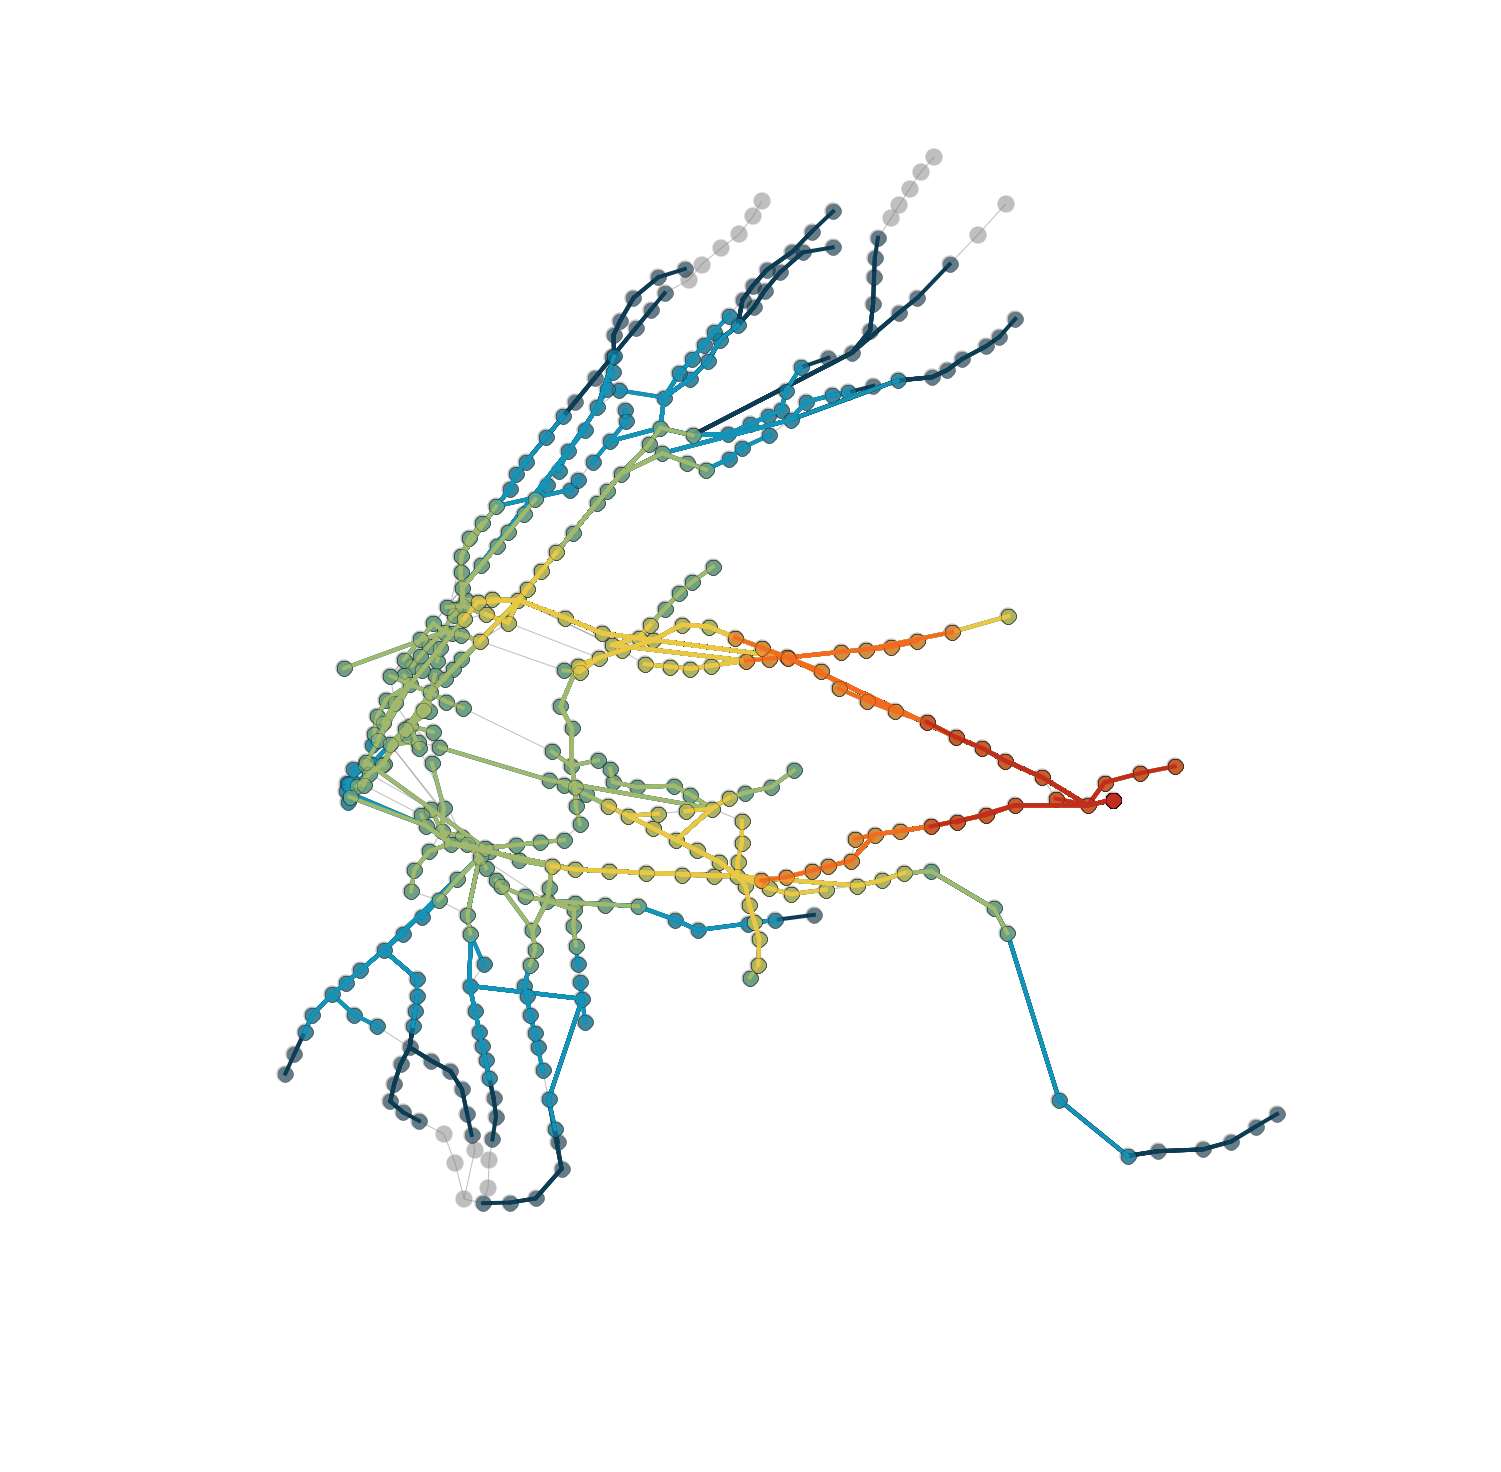

In [9]:
# node is starting node
# last argument is number of minutes

node = 'G05' #jamaica center

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

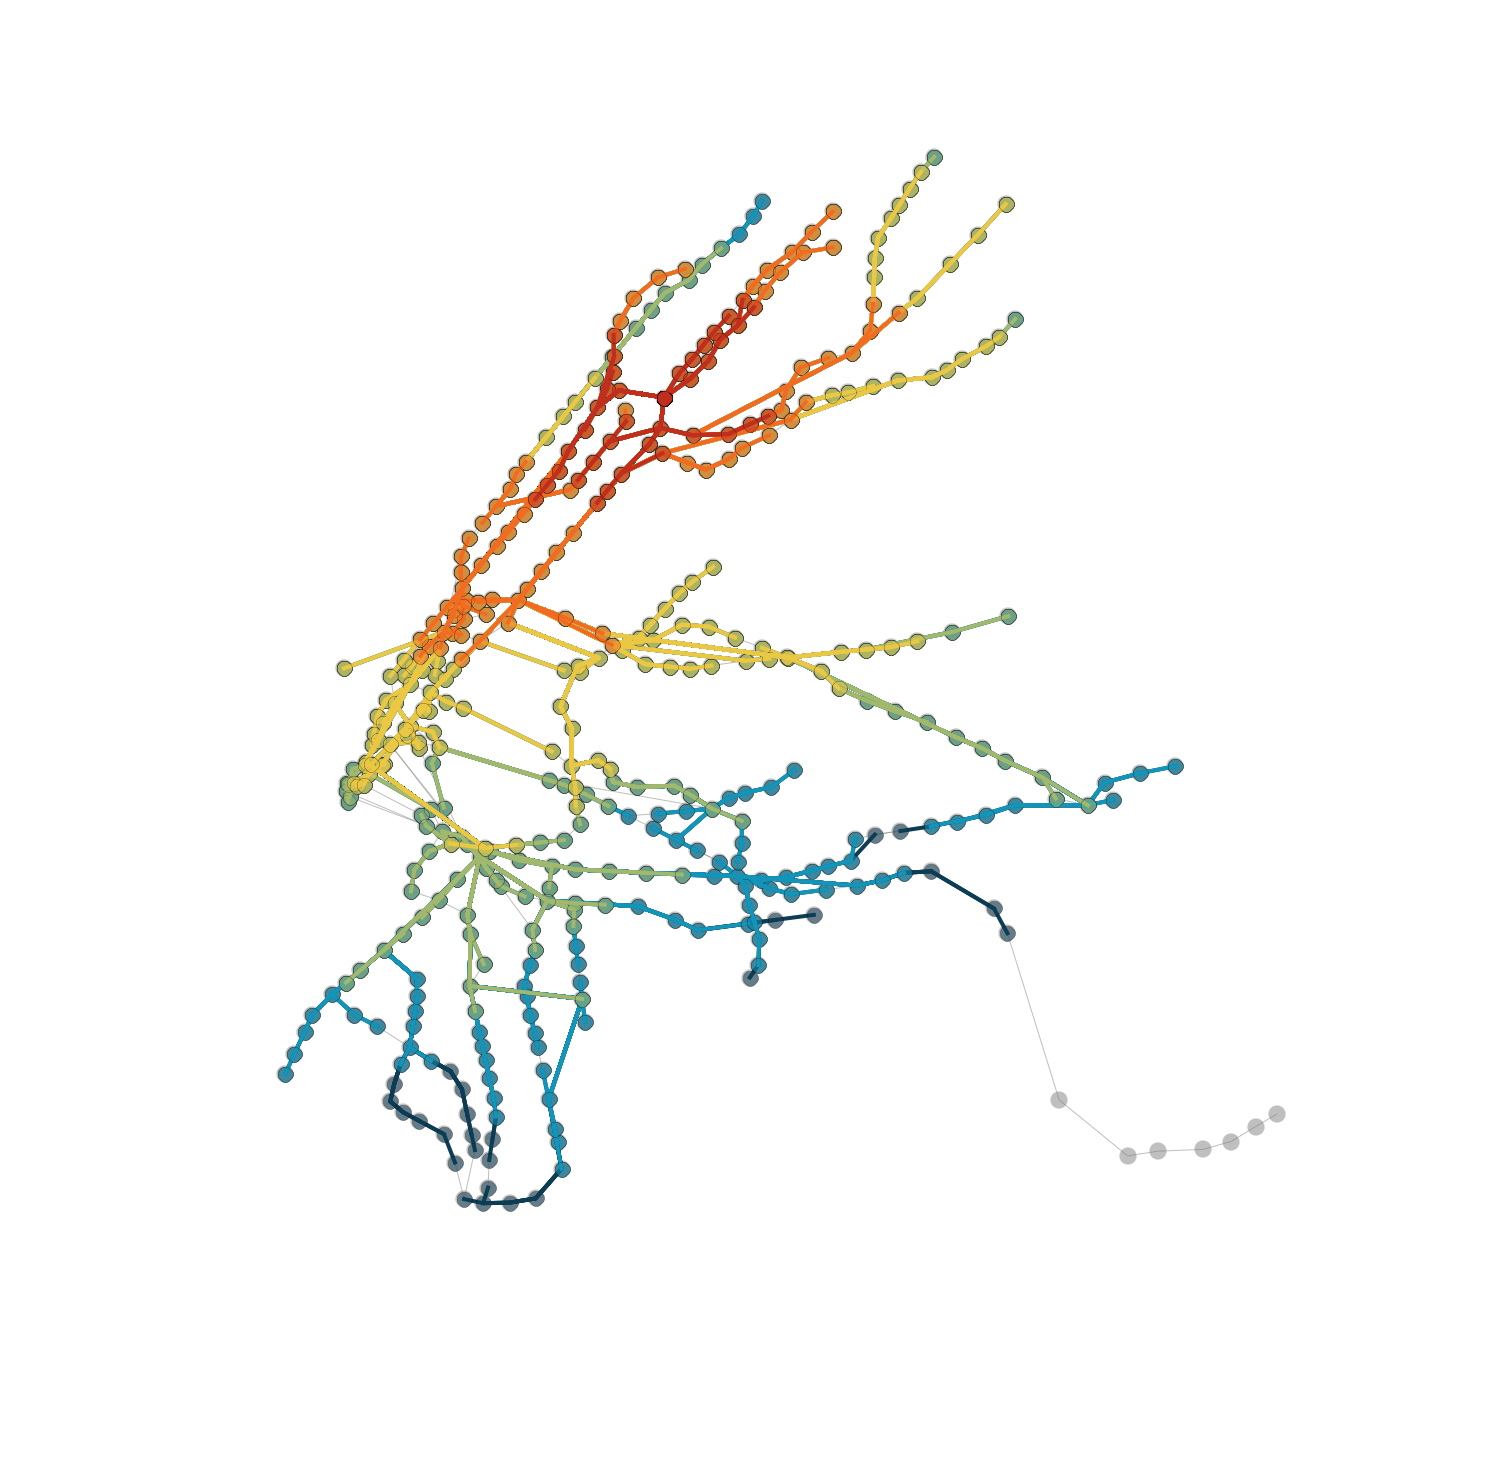

In [10]:
# node is starting node
# last argument is number of minutes

node = 'D11' #yankee stadium

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

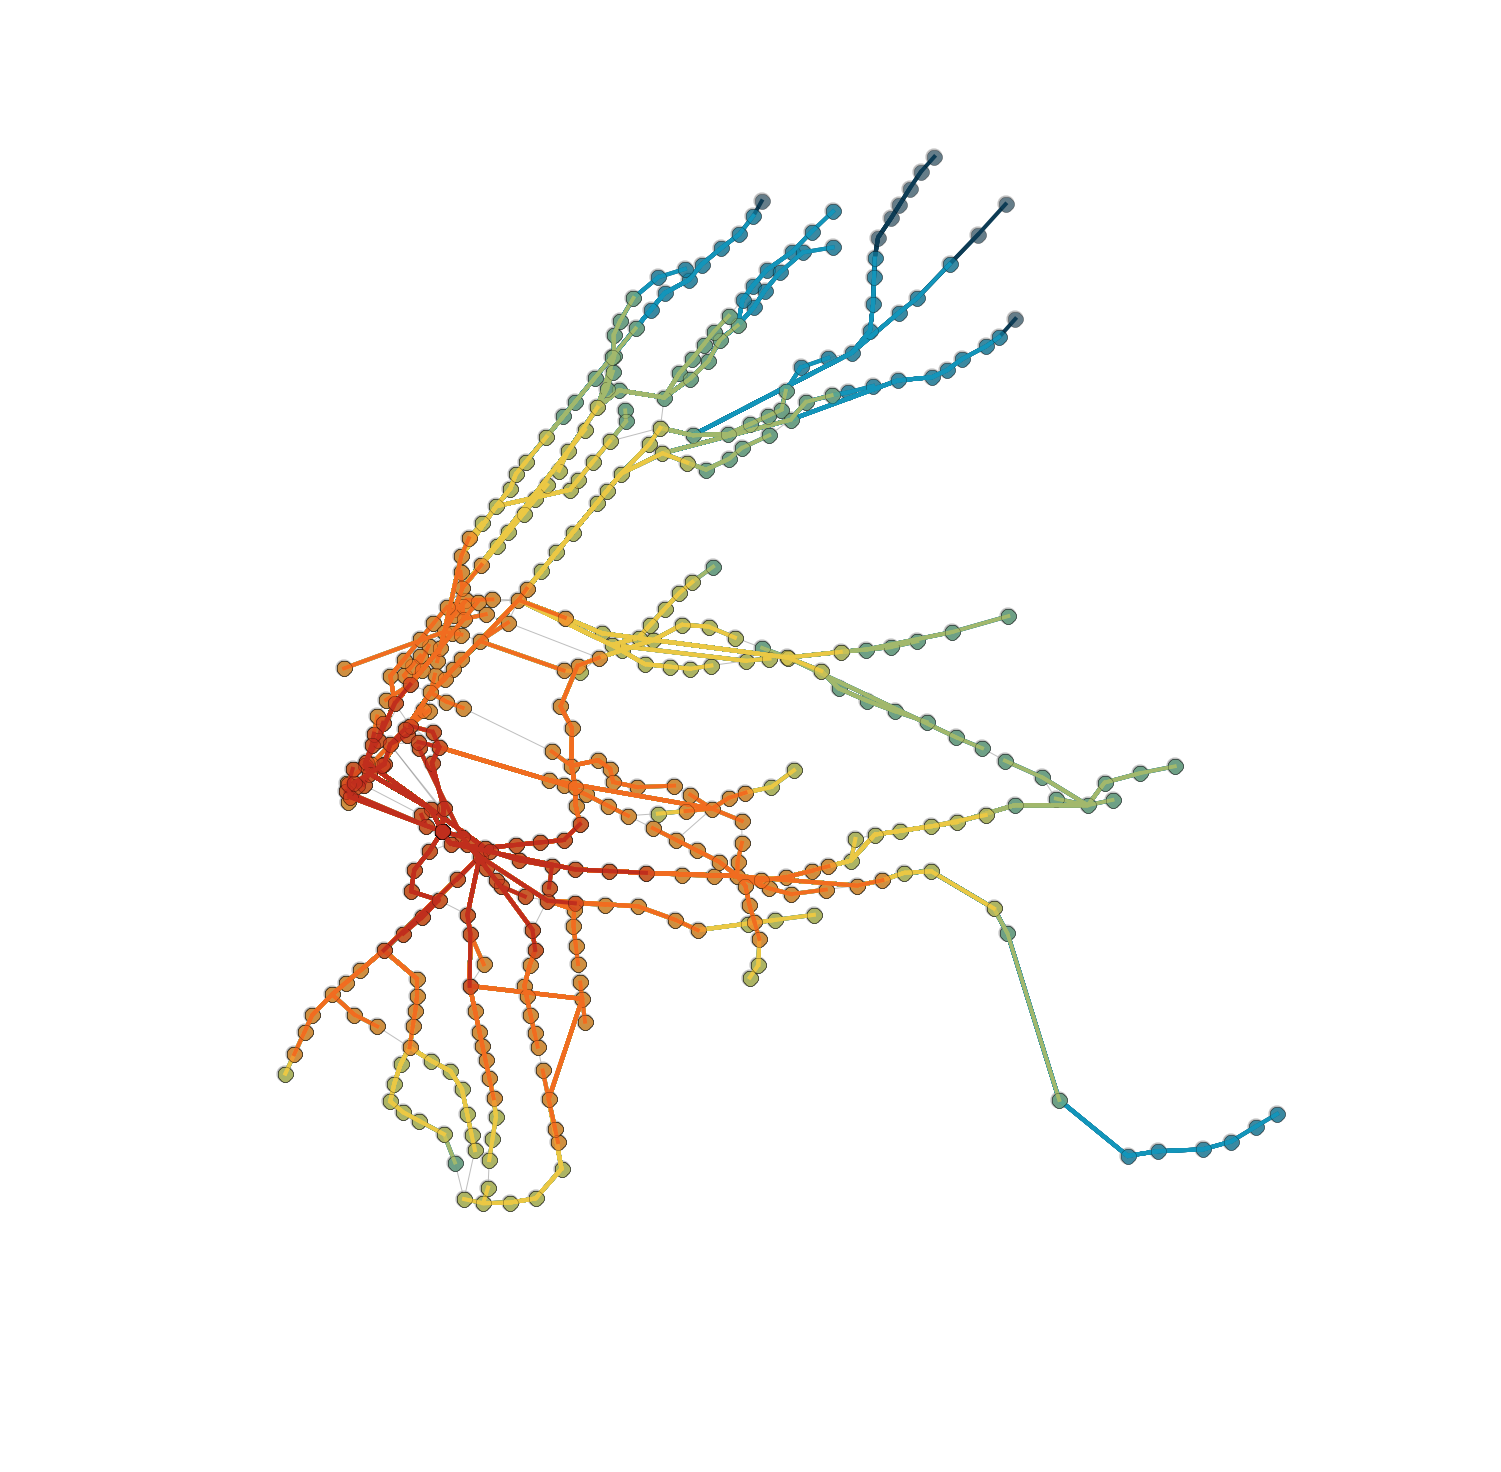

In [11]:
# node is starting node
# last argument is number of minutes

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

# Time vs Stations Plot

In [12]:
node = 'R16'

graph_dict_1 = {}
graph_dict_1['time'] = []
graph_dict_1['nodes'] = []

for t in range(len(time)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time[t])
    graph_dict_1['time'].append(time[t])
    graph_dict_1['nodes'].append(len(shortpath))
    
node = 'G05'

graph_dict_2 = {}
graph_dict_2['time'] = []
graph_dict_2['nodes'] = []

for t in range(len(time)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time[t])
    graph_dict_2['time'].append(time[t])
    graph_dict_2['nodes'].append(len(shortpath))
    
node = 'D11'

graph_dict_3 = {}
graph_dict_3['time'] = []
graph_dict_3['nodes'] = []

for t in range(len(time)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time[t])
    graph_dict_3['time'].append(time[t])
    graph_dict_3['nodes'].append(len(shortpath))
    
node = 'A41'

graph_dict_4 = {}
graph_dict_4['time'] = []
graph_dict_4['nodes'] = []

for t in range(len(time)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time[t])
    graph_dict_4['time'].append(time[t])
    graph_dict_4['nodes'].append(len(shortpath))
    
#for key,value in shortpath.iteritems():
#    visualize_path(value)

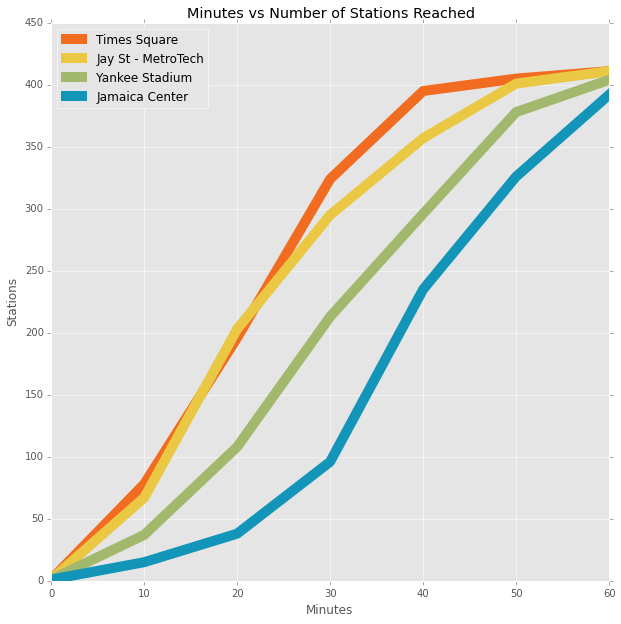

In [13]:
# Create a figure of size 10,10
figure, ax = plt.subplots(figsize=(10,10))

# Line of x vs y
ax.plot(graph_dict_1['time'], graph_dict_1['nodes'], color = '#F16C20', linewidth = 10, label = 'Times Square')
ax.plot(graph_dict_4['time'], graph_dict_4['nodes'], color = '#EBC844', linewidth = 10, label = 'Jay St - MetroTech')
ax.plot(graph_dict_3['time'], graph_dict_3['nodes'], color = '#A2B86C', linewidth = 10, label = 'Yankee Stadium')
ax.plot(graph_dict_2['time'], graph_dict_2['nodes'], color = '#1395BA', linewidth = 10, label = 'Jamaica Center')
ax.legend(loc = 'upper left')
ax.set_xlabel('Minutes')
ax.set_ylabel('Stations')
ax.set_title('Minutes vs Number of Stations Reached')

#Spider Web Plot Over Time (Jay Street)

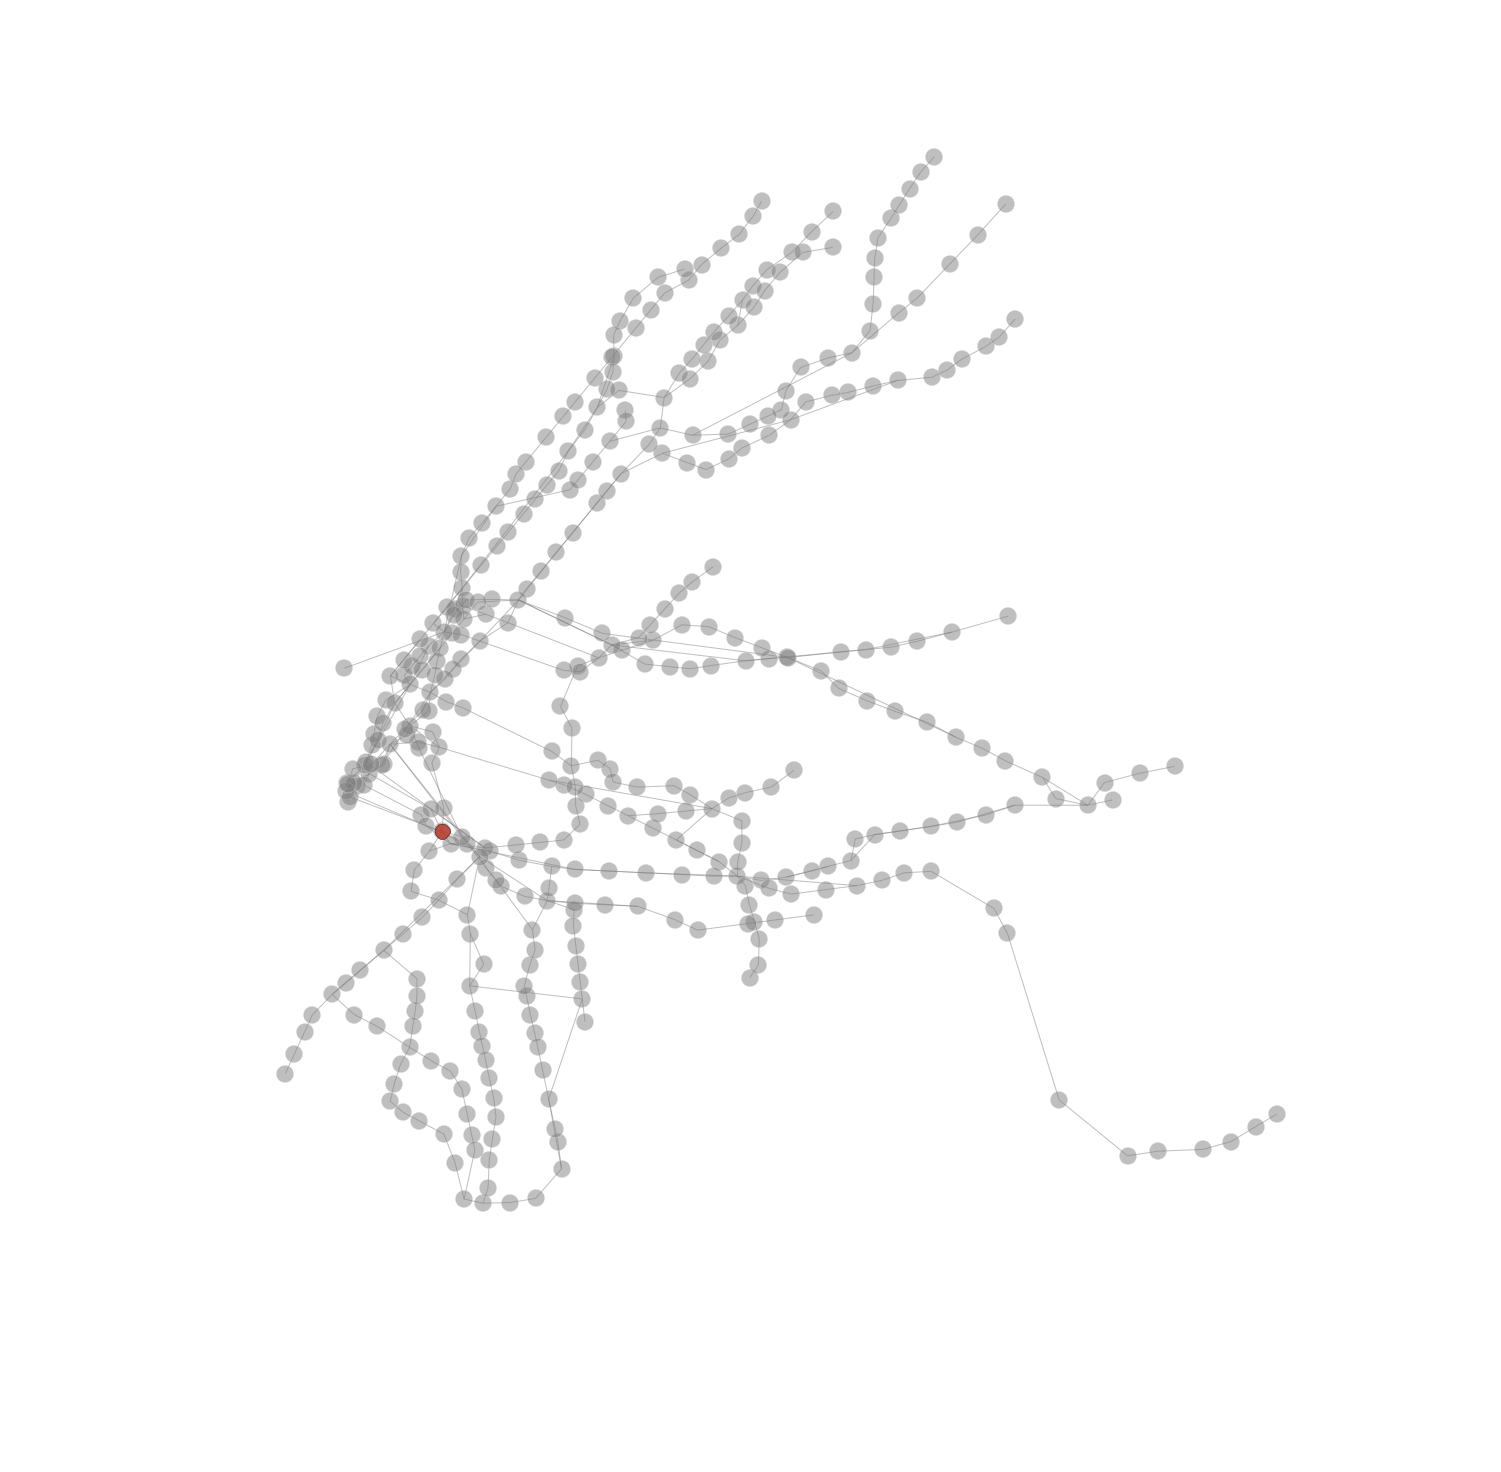

In [14]:
time_2 = [0]
colors = ['#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

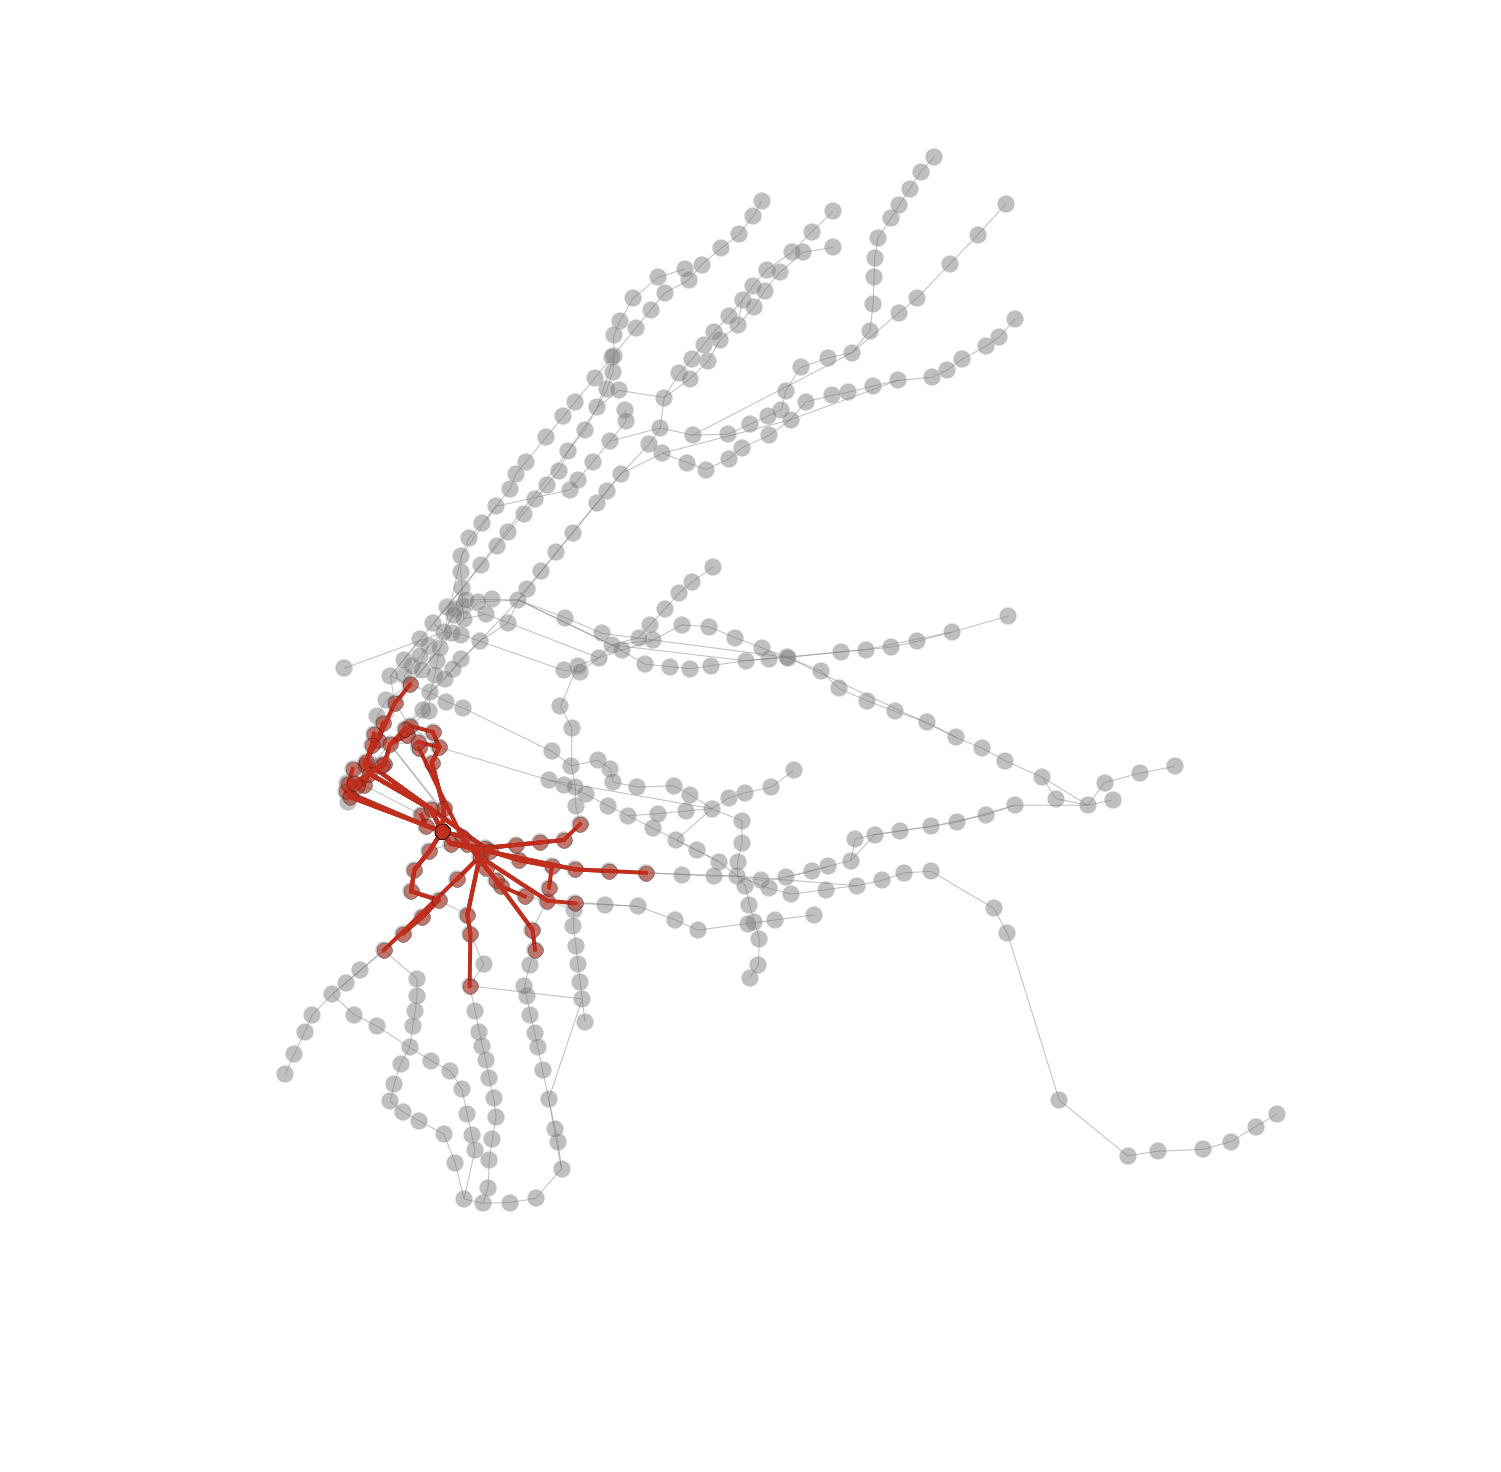

In [15]:
time_2 = [10, 0]
colors = ['#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

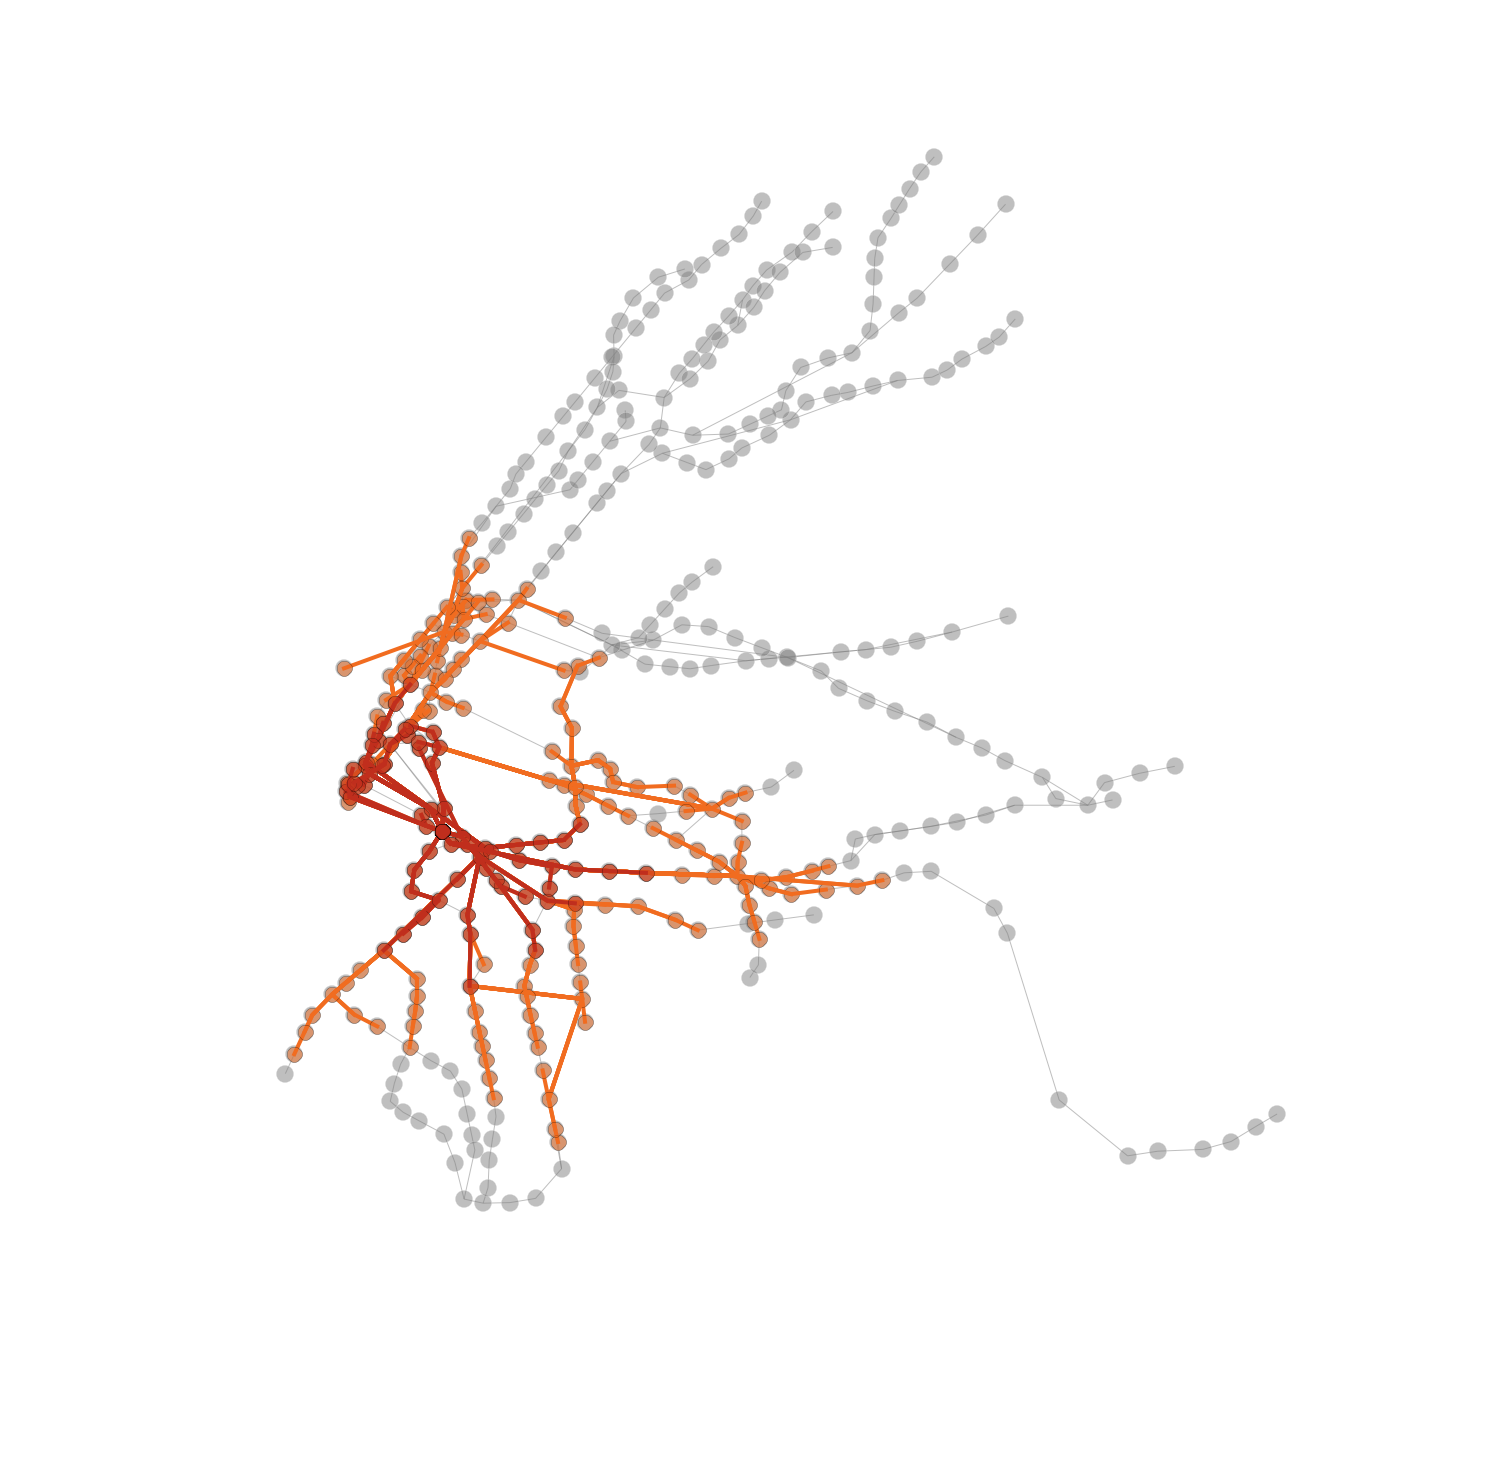

In [16]:
time_2 = [20, 10, 0]
colors = ['#F16C20', '#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

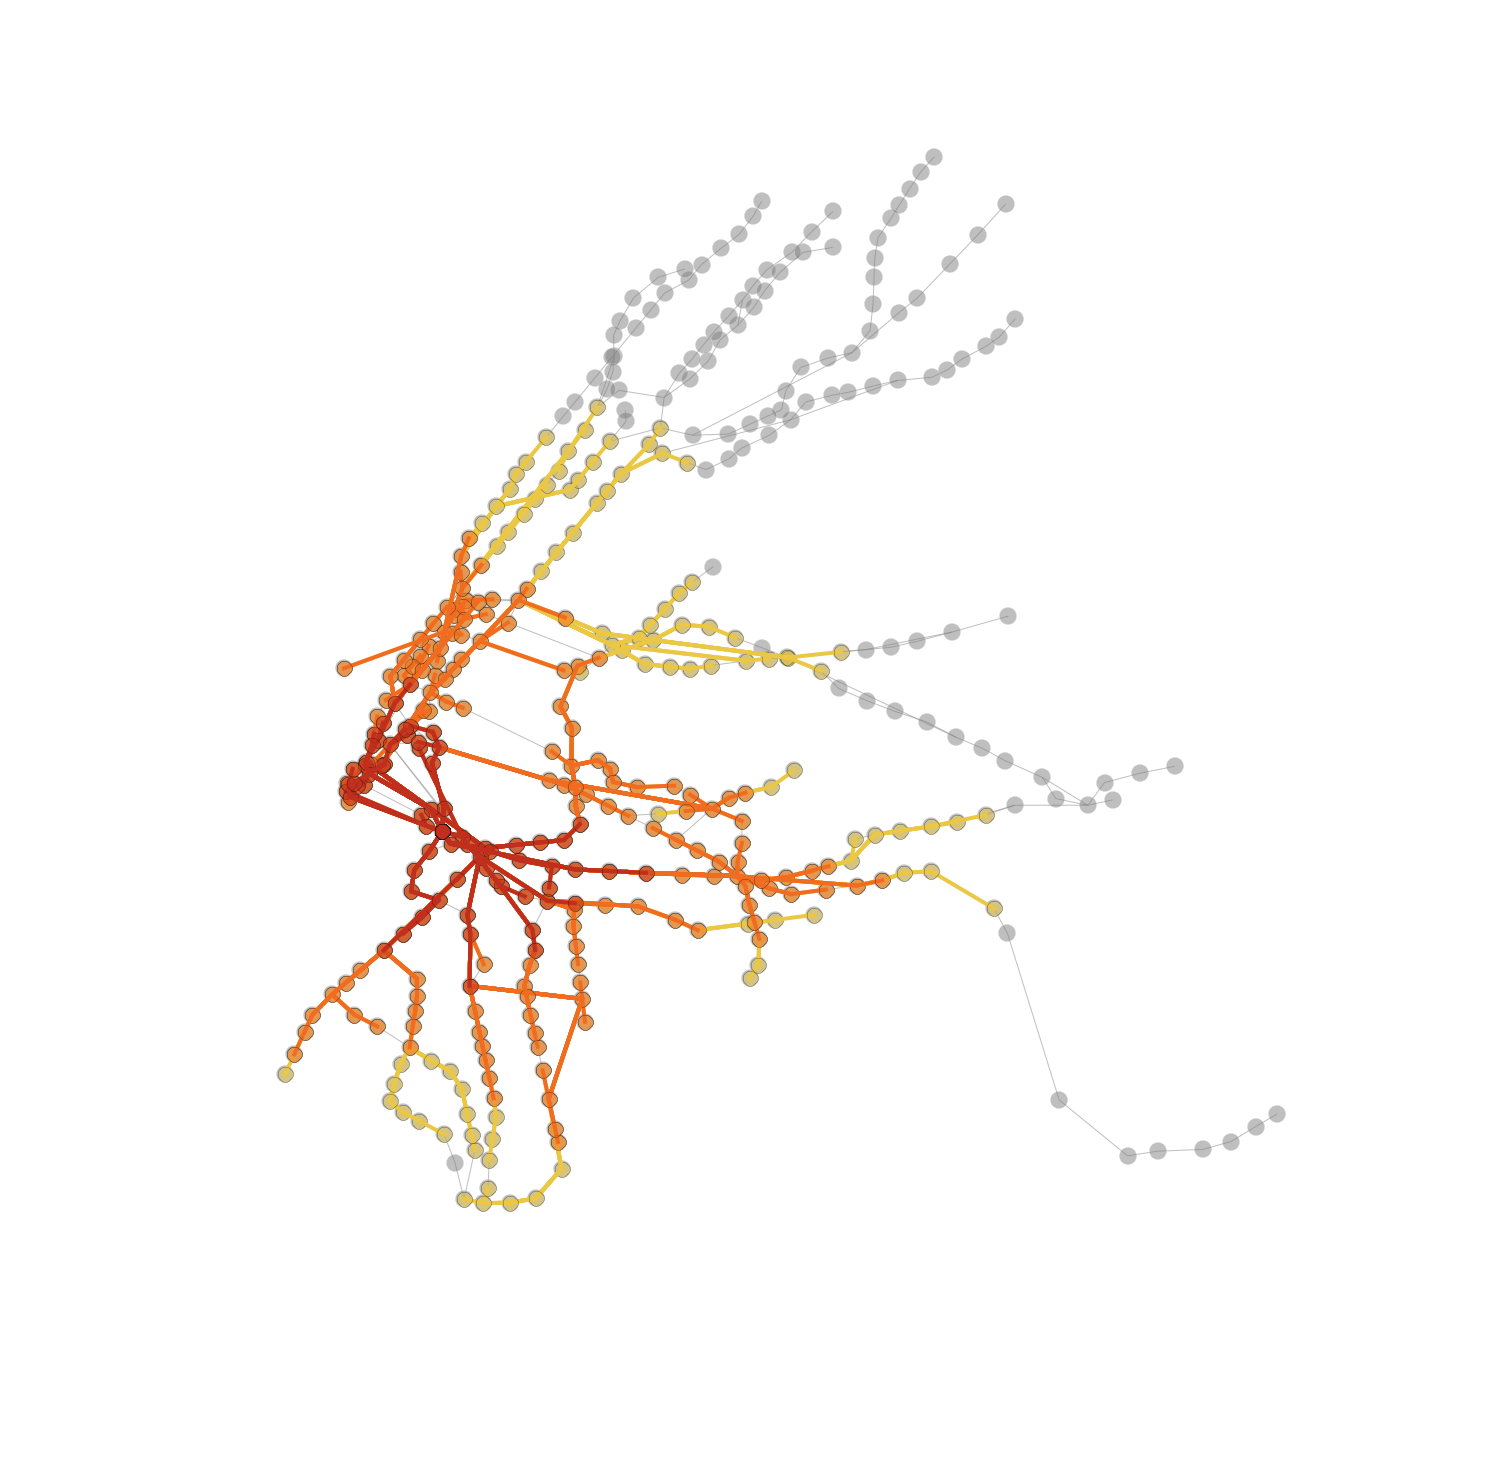

In [17]:
time_2 = [30, 20, 10, 0]
colors = ['#EBC844', '#F16C20', '#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

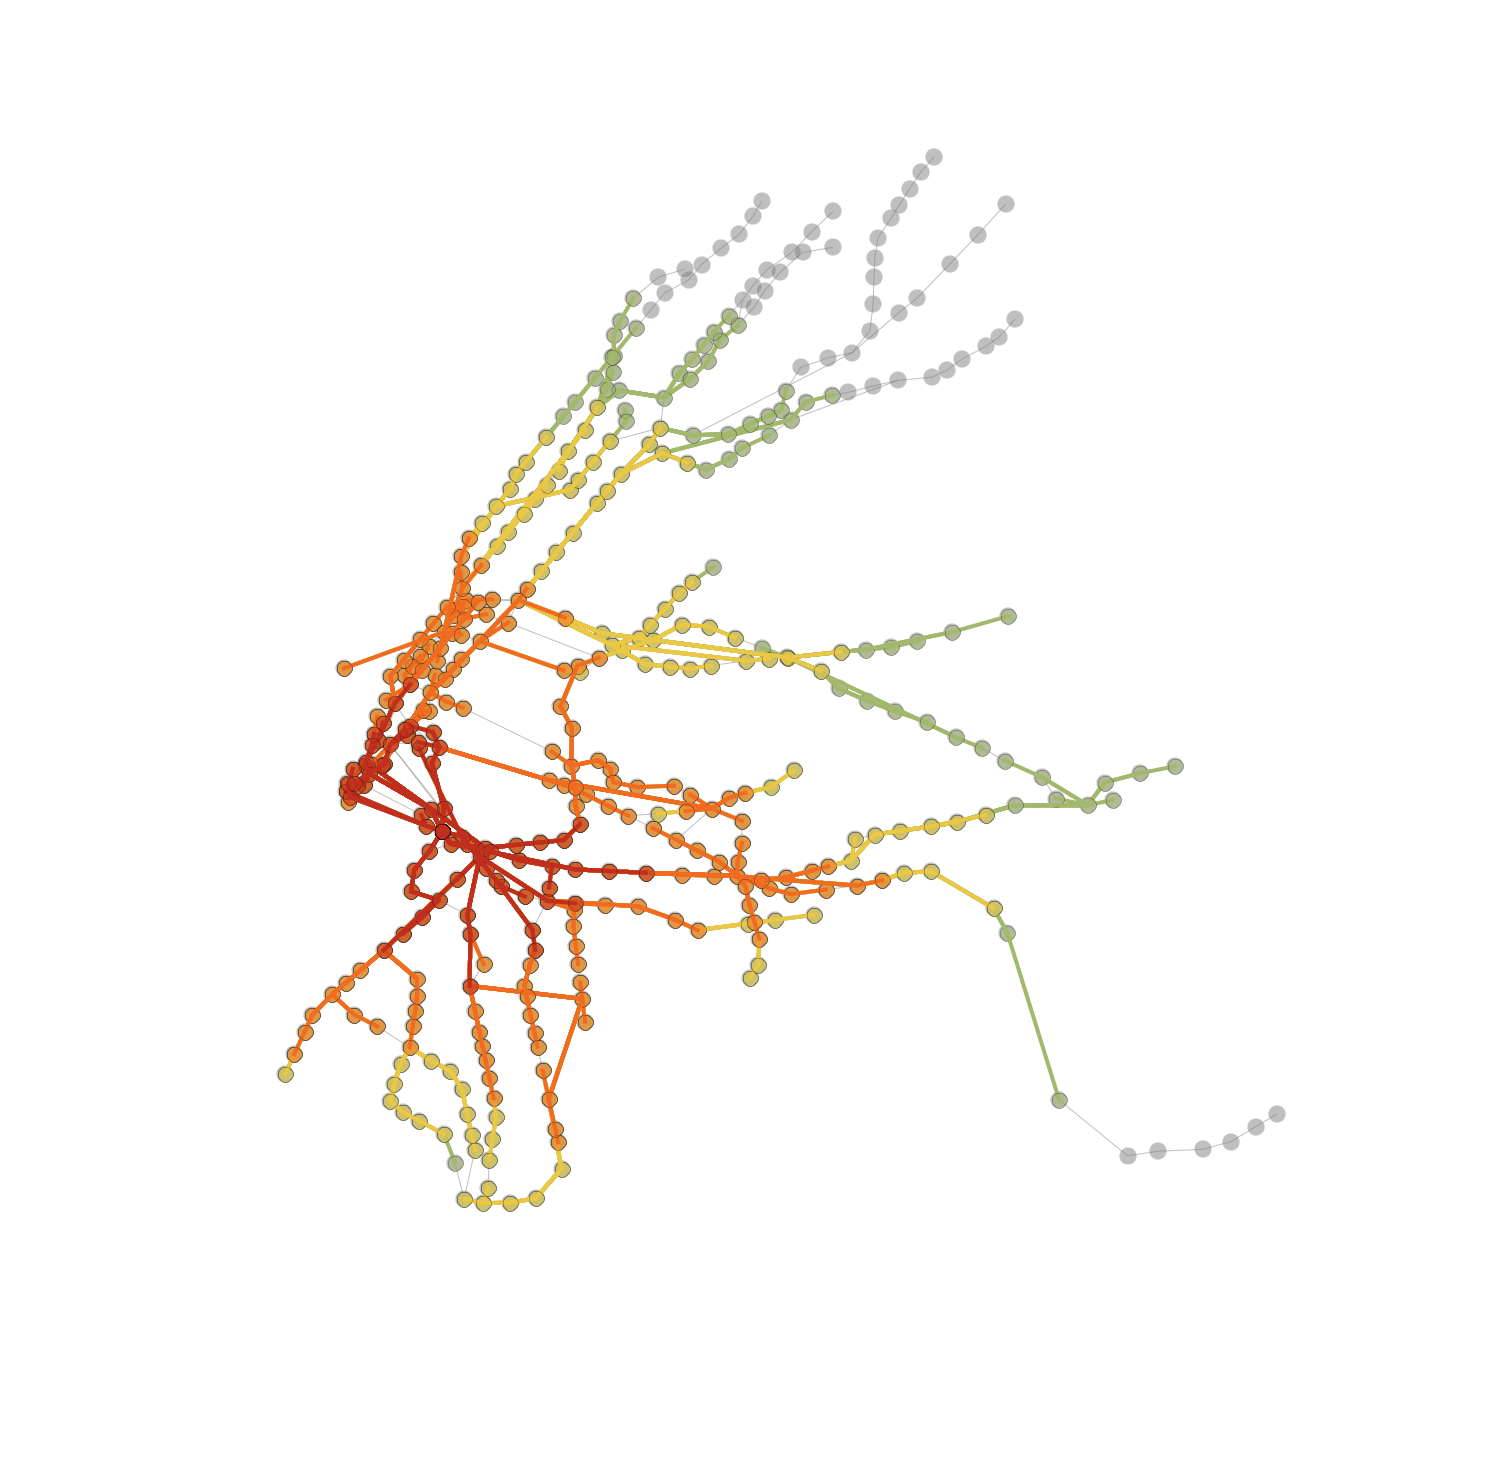

In [18]:
time_2 = [40, 30, 20, 10, 0]
colors = ['#A2B86C', '#EBC844', '#F16C20', '#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

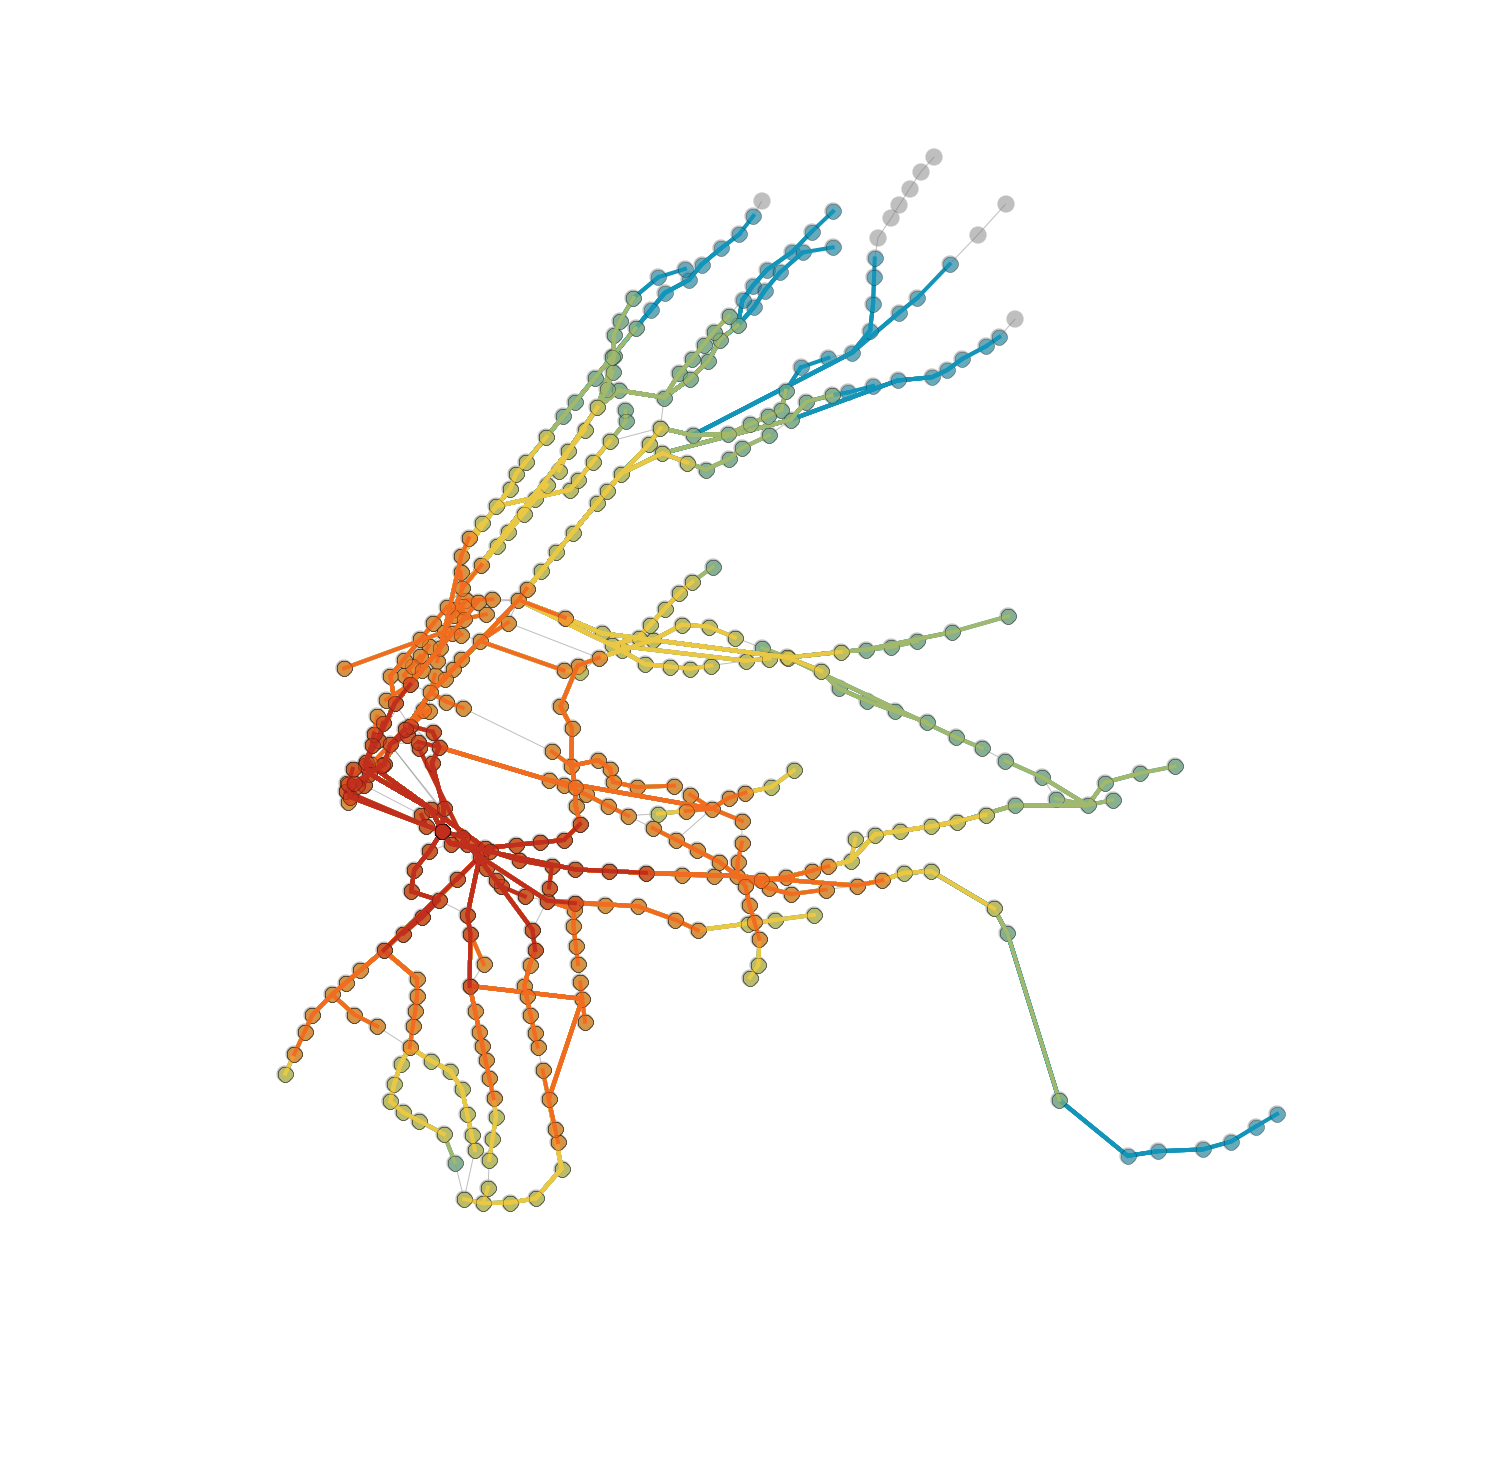

In [19]:
time_2 = [50, 40, 30, 20, 10, 0]
colors = ['#1395BA', '#A2B86C', '#EBC844', '#F16C20', '#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])

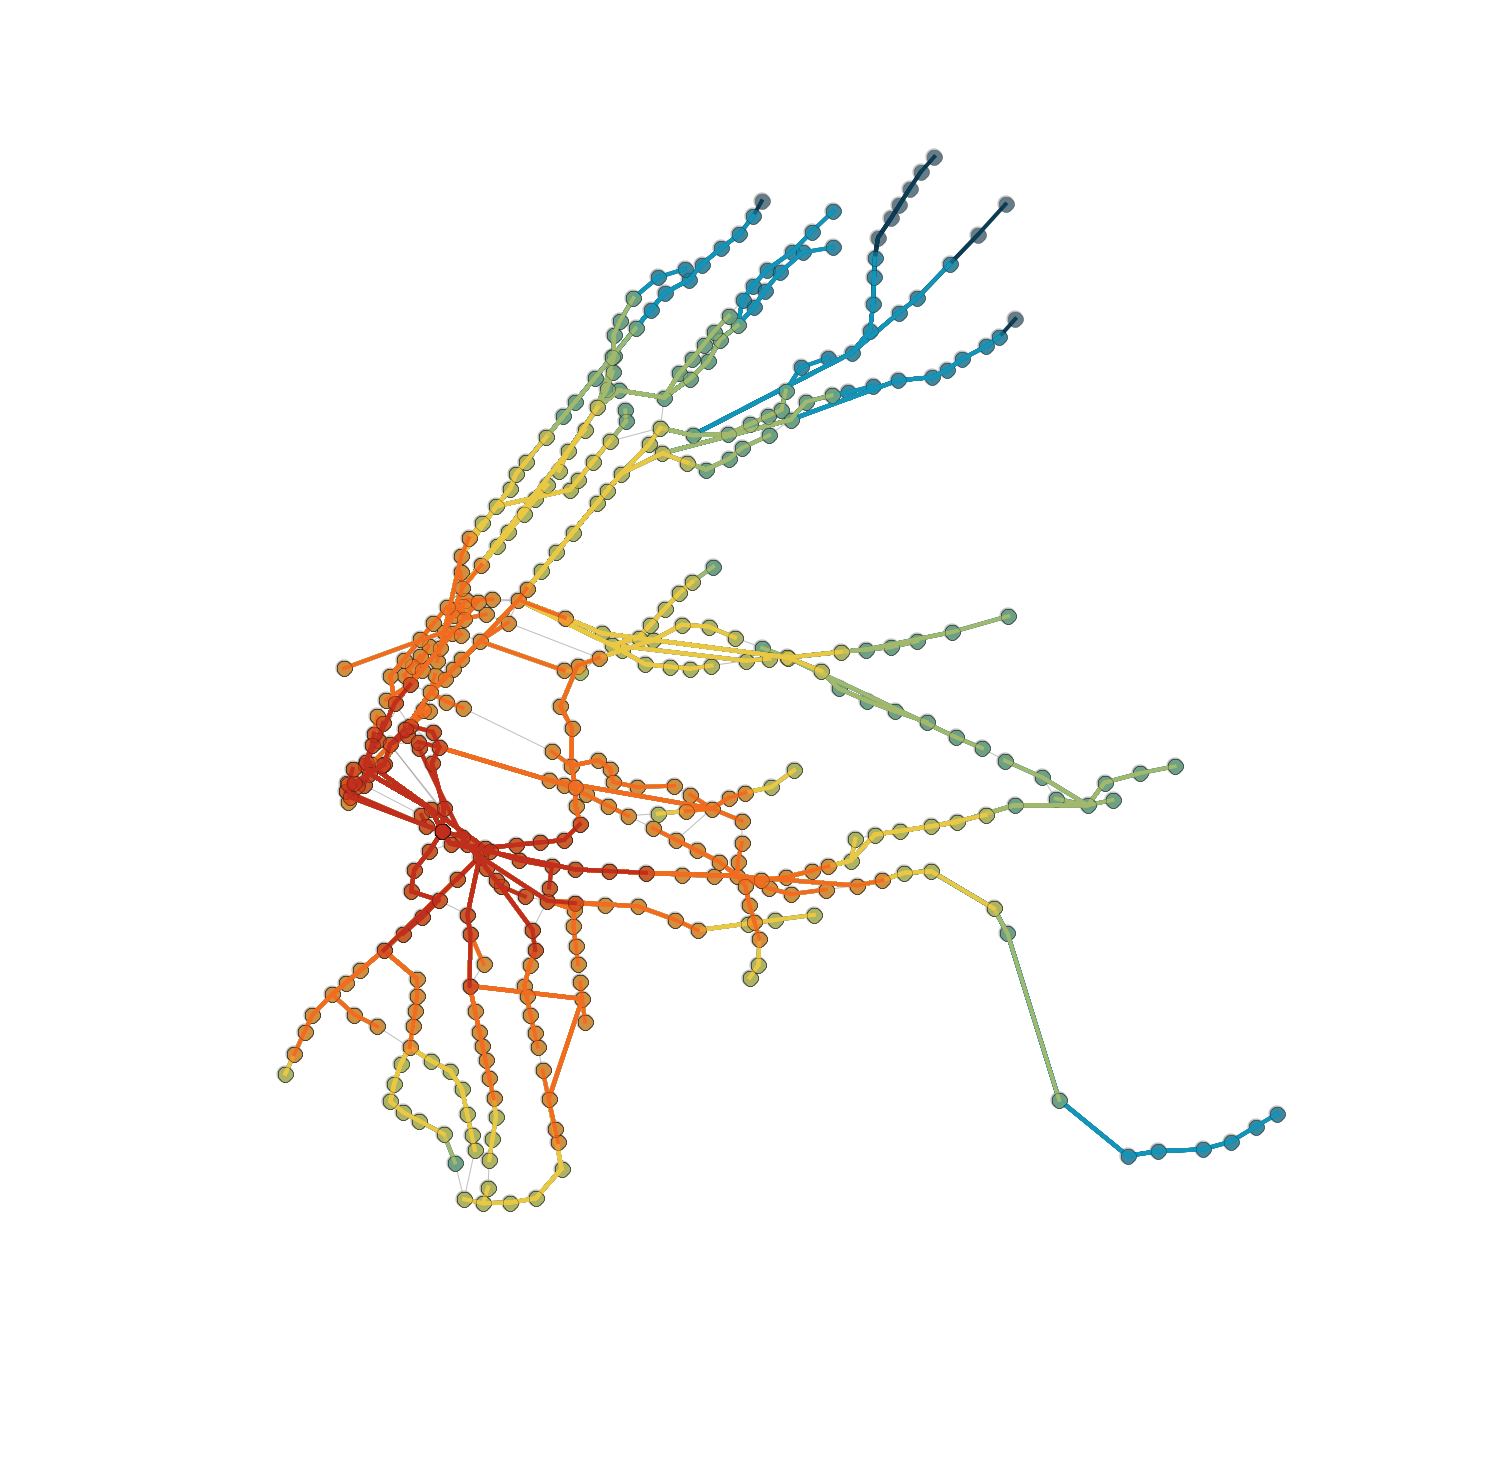

In [20]:
time_2 = [60, 50, 40, 30, 20, 10, 0]
colors = ['#0D3C55', '#1395BA', '#A2B86C', '#EBC844', '#F16C20', '#C02E1D', '#C02E1D']

node = 'A41' #CUSP - Jay St - MetroTech

plt.figure(figsize = (20,20))
nx.draw(networkA,pos=pos,with_labels=False,arrows=False,node_size=300, node_color='gray', edge_color='grey', alpha = 0.5)

for i in range(len(time_2)):
    shortpath = nx.single_source_dijkstra_path(networkA, node, time_2[i])
    for key,value in shortpath.iteritems():
        visualize_path(value, colors[i], colors[i])